In [81]:
import graphAlgorithms as ga

# Load & Pre-Process Networks

load data set 

you can store your networks in any common format 

the graphAlgorithms package requires that the networks are provided as NetworkX Graph objects - refer to its documentation for detailed instructions

the networks should be weighted, if you have an unweighted network then assign all edges the same edge weight

the package assumes "weight" to be the default edge weight label, but this can be set when needed

In [2]:
#location where the raw data files are stored
# TODO: change to package location 
graph_location = "/mnt/data/apavel/graphalgo/testset/"

In [3]:
#location where output should be saved
location = "/mnt/data/apavel/graphalgo/testoutput/"

below an example on how to load an Edgelist with column headings into a NetworkX Graph object

TODO: add other examples ? or in a separate file?

In [4]:
import glob
import pandas as pd
import networkx as nx
import numpy as np

In [5]:

labels = []
networks_graphs = []

print("load networks")
#gets all files located in the specified folder that end on .edgelist
for path in glob.glob(graph_location +"*.edgelist"):
    
    #you can specify that only part of the file name should be used as network name for later identification
    name =  path.split("/")[-1].replace(".rds.edgelist", "")
    
    
    #read the edgelist file as a dataframe
    fh = pd.read_csv(path, sep="\t")
    #convert it into a NetworkX graph G and specify the column names of the node pairs
    G=nx.from_pandas_edgelist(fh, "V1", "V2")
    
    #if you have an unweighted network assign all edges the same edge weight - here a value of 1 is assigned
    for u, v, d in G.edges(data=True):
        d['weight'] = 1
        
    
    #save the graph objects to a list (only suitable if small networks are processed)
    #this is the main objects used for the examples below, which contains all networks
    networks_graphs.append(G)
    labels.append(name)
   

    

    print("loaded", name)

load networks
loaded lestaurtinib
loaded labetalol
loaded levothyroxine
loaded lamotrigine
loaded levetiracetam
loaded linifanib
loaded lorazepam
loaded levobunolol
loaded levomepromazine
loaded liothyronine
loaded lidocaine
loaded latanoprost
loaded loxapine
loaded lapatinib


the graph objects are converted into a list of lists format, which is used by most of the distance functions

In [6]:
networks = ga.get_node_similarity.preprocess_graph(networks_graphs, attribute="weight")

the networks are now in this format

in each sublists item 0 & 1 are node ids and the edge weight is at position 2

In [7]:
networks[0]

[[780, 2114, 1],
 [780, 6659, 1],
 [780, 664, 1],
 [780, 26064, 1],
 [780, 1514, 1],
 [780, 10123, 1],
 [780, 10444, 1],
 [780, 8518, 1],
 [780, 10450, 1],
 [780, 2542, 1],
 [780, 1429, 1],
 [780, 3566, 1],
 [780, 8624, 1],
 [780, 10732, 1],
 [780, 7360, 1],
 [780, 51375, 1],
 [780, 670, 1],
 [780, 1500, 1],
 [780, 10284, 1],
 [780, 7511, 1],
 [780, 5523, 1],
 [780, 10362, 1],
 [780, 23061, 1],
 [780, 23039, 1],
 [780, 1123, 1],
 [780, 9842, 1],
 [780, 1955, 1],
 [780, 30, 1],
 [780, 64781, 1],
 [780, 55165, 1],
 [780, 79724, 1],
 [780, 5716, 1],
 [780, 55862, 1],
 [780, 51742, 1],
 [780, 8996, 1],
 [780, 55620, 1],
 [780, 6253, 1],
 [2114, 7296, 1],
 [2114, 6659, 1],
 [2114, 9559, 1],
 [2114, 664, 1],
 [2114, 26064, 1],
 [2114, 1514, 1],
 [2114, 55746, 1],
 [2114, 10123, 1],
 [2114, 79921, 1],
 [2114, 11098, 1],
 [2114, 8518, 1],
 [2114, 2542, 1],
 [2114, 3251, 1],
 [2114, 1429, 1],
 [2114, 3566, 1],
 [2114, 25805, 1],
 [2114, 8624, 1],
 [2114, 11230, 1],
 [2114, 10732, 1],
 [2114, 53

OPTIONAL: Convert the node names to ints

make sure you save the mapping file to retrieve your original node ids

In [8]:
network_lists, mapping = ga.get_node_similarity.preprocess_node_list(networks)

In [9]:
import pickle

In [10]:
with open(location + "node_id_mapping.pckl", "wb") as f:
    pickle.dump(mapping, f, protocol=4)

# Node Similarity

compute node properties such as degree centrality, betweenness centrality and closeness centrality and shared nodes between networks (when you have networks with different nodes) 

sorted_nodes contains the node ids sorted after the selected properties as well as the mean and median ranking

centrality_values contains the selected properties for each node

shared_nodes contains for each nodes in how many networks it occures (this may be useful for networks that do not have the same nodes)

binary contains the shared nodes in a binary representation

you can select which format is the most suitable for you analysis

make sure to remove asynchrone option when running in jupyter notebooks

this is a wrapper function - if you are only interested in one output you can call the single function directly, for this please refer to the documentation

In [11]:
sorted_nodes, shared_nodes, binary, centrality_values = ga.get_node_similarity.sort_list_and_get_shared(network_lists, mapping, networks_graphs, labels, degree_centrality=True, closeness_centrality=True, betweenness=True, degree=False, in_async=False)

lestaurtinib
labetalol
levothyroxine
lamotrigine
levetiracetam
linifanib
lorazepam
levobunolol
levomepromazine
liothyronine
lidocaine
latanoprost
loxapine
lapatinib
1
2
3
average position is calculated
1
2
3
average position is calculated
1
2
3
average position is calculated
1
2
3
average position is calculated
1
2
3
average position is calculated
1
2
3
average position is calculated
1
2
3
average position is calculated
1
2
3
average position is calculated
1
2
3
average position is calculated
1
2
3
average position is calculated
1
2
3
average position is calculated
1
2
3
average position is calculated
1
2
3
average position is calculated
1
2
3
average position is calculated


TODO maybe use kendall instead of wrapper since others are not used/ applicable in this case??

based on this data now multiple distances between the networks can be calculated

this is a wrapper function calling different distance measures, if you are interested in only one distance you can use the single function directly. For this refer to the documentation

this wrapper returns distance/similarity matrices of jaccard similarity, jaccard distance, percentage of shared nodes, kendall rank correlation of degree centrality, closeness centrality and betweenness centrality and mean / median ranking as well as the corresponding p-values for the top and bottom kendall_x nodes (or as here all nodes), hamming distance and SMC similarity

if not all values are needed to be calculated you can use the individual functions called in the wrapper

In [12]:
j, jd, percentage, kendall_dc_top, b_dc_top, kendall_cc_top, b_cc_top, kendall_betweenness_top, b_b_top, kendall_avg_top, b_avg_top, hamming, kendall_dc_bottom , b_dc_bottom , kendall_cc_bottom , b_cc_bottom , kendall_betweenness_bottom , b_b_bottom , kendall_avg_bottom , b_avg_bottom , smc, kendall_med_top, b_med_top, kendall_med_bottom, b_med_bottom = ga.get_node_similarity.estimate_similarities_nodes(network_lists, sorted_nodes, binary,  kendall_x=len(mapping), is_file=False, in_async=False)

kendall top
check if kendall x is small enough 
(0, 0)
(0, 1)
(0, 2)
(0, 3)
(0, 4)
(0, 5)
(0, 6)
(0, 7)
(0, 8)
(0, 9)
(0, 10)
(0, 11)
(0, 12)
(0, 13)
(1, 0)
(1, 1)
(1, 2)
(1, 3)
(1, 4)
(1, 5)
(1, 6)
(1, 7)
(1, 8)
(1, 9)
(1, 10)
(1, 11)
(1, 12)
(1, 13)
(2, 0)
(2, 1)
(2, 2)
(2, 3)
(2, 4)
(2, 5)
(2, 6)
(2, 7)
(2, 8)
(2, 9)
(2, 10)
(2, 11)
(2, 12)
(2, 13)
(3, 0)
(3, 1)
(3, 2)
(3, 3)
(3, 4)
(3, 5)
(3, 6)
(3, 7)
(3, 8)
(3, 9)
(3, 10)
(3, 11)
(3, 12)
(3, 13)
(4, 0)
(4, 1)
(4, 2)
(4, 3)
(4, 4)
(4, 5)
(4, 6)
(4, 7)
(4, 8)
(4, 9)
(4, 10)
(4, 11)
(4, 12)
(4, 13)
(5, 0)
(5, 1)
(5, 2)
(5, 3)
(5, 4)
(5, 5)
(5, 6)
(5, 7)
(5, 8)
(5, 9)
(5, 10)
(5, 11)
(5, 12)
(5, 13)
(6, 0)
(6, 1)
(6, 2)
(6, 3)
(6, 4)
(6, 5)
(6, 6)
(6, 7)
(6, 8)
(6, 9)
(6, 10)
(6, 11)
(6, 12)
(6, 13)
(7, 0)
(7, 1)
(7, 2)
(7, 3)
(7, 4)
(7, 5)
(7, 6)
(7, 7)
(7, 8)
(7, 9)
(7, 10)
(7, 11)
(7, 12)
(7, 13)
(8, 0)
(8, 1)
(8, 2)
(8, 3)
(8, 4)
(8, 5)
(8, 6)
(8, 7)
(8, 8)
(8, 9)
(8, 10)
(8, 11)
(8, 12)
(8, 13)
(9, 0)
(9, 1)
(9, 2)
(9, 3)
(9, 4)

This distances can be merged into a single distance matrix or used individually

Since all networks have the same nodes, we will only use the average rank correlation matrix but transform it into a distance - the correlation value c is transformed to a distance with (1-c)/2 

In [13]:
import numpy as np

In [14]:
median_dist = kendall_med_top.copy()

for index, x in np.ndenumerate(median_dist):
    d = (1-x)/2
    
    median_dist[index[0]][index[1]] = d
    
    if index[0] == index[1]:
        median_dist[index[0]][index[1]] = 0

In [15]:
median_dist_nodes = median_dist.copy()

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

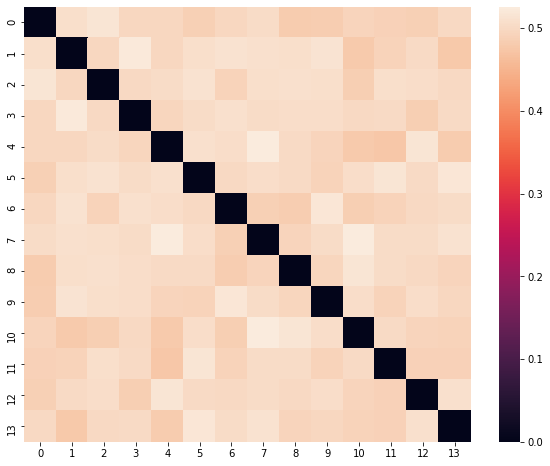

In [17]:
fig, ax = plt.subplots(figsize=(10,8))  

sns.heatmap(median_dist, annot=False, ax=ax)

# Edge Similarity

we will use the same preprocessed networks as already generated

since the here used networks are unweighted we can assigne each edge its edge betweenness value as weight and compare the networks based on this value for shared edges

In [18]:
print("sort edges after edge betweenness")
bet = []
graphs_with_betweenness = []
for net in networks_graphs:
    edges_betweenness = nx.edge_betweenness_centrality(net)
    bet.append(edges_betweenness)
    #write as new attribute to graph
    temp = nx.set_edge_attributes(net, edges_betweenness, "betweenness")
    

sort edges after edge betweenness


we need to convert the networks again into the list of lists format, since this time the betweeness values will be used and assign each edge an id

In [19]:
networks = ga.get_edge_similarity.preprocess_graph(networks_graphs, attribute="betweenness")

print("map edges to id")

network_lists, mapping = ga.get_edge_similarity.preprocess_edge_list(networks)

with open(location + "edge_id_mapping.pckl", "wb") as f:
    pickle.dump(mapping, f, protocol=4)

map edges to id


sort edges after betweenness value & estimate for each edge in which network it appears

In [20]:
sorted_networks, shared_edges, binary = ga.get_edge_similarity.sort_list_and_get_shared(networks, mapping, network_lists, labels, in_async=False)

lestaurtinib
labetalol
levothyroxine
lamotrigine
levetiracetam
linifanib
lorazepam
levobunolol
levomepromazine
liothyronine
lidocaine
latanoprost
loxapine
lapatinib


compute distances/ similarities between the networks based on their similarity in edges

the wrapper function returns jaccard similarity, jaccard distance, kendall rank coefficient for kendall_x top and bottom edges (here ranked after betweenness), hamming distance and SMC similarity

if only specific distances are needed the individual functions can be called, please refer to the documentation for this

In [21]:
j, jd, percentage, kendall_top,b_top, kendall_bottom, b_bottom, hamming, smc = ga.get_edge_similarity.estimate_similarities_edges(network_lists, sorted_networks, binary,  kendall_x=100, is_file=False, in_async=False)

check if kendall x is small enough 
(0, 0)
(0, 1)
input lists have different length
(0, 2)
input lists have different length
(0, 3)
input lists have different length
(0, 4)
input lists have different length
(0, 5)
input lists have different length
(0, 6)
input lists have different length
(0, 7)
input lists have different length
(0, 8)
input lists have different length
(0, 9)
input lists have different length
(0, 10)
input lists have different length
(0, 11)
input lists have different length
(0, 12)
input lists have different length
(0, 13)
input lists have different length
(1, 0)
(1, 1)
(1, 2)
input lists have different length
(1, 3)
input lists have different length
(1, 4)
input lists have different length
(1, 5)
input lists have different length
(1, 6)
input lists have different length
(1, 7)
input lists have different length
(1, 8)
input lists have different length
(1, 9)
input lists have different length
(1, 10)
input lists have different length
(1, 11)
input lists have different l

convert the similairty measures into distances where applicable

since the networks have different edges, we will use all metrics to create a combined distance matrix (if your network has partially different nodes, you can use these commands to merge & convert them as well)

In [22]:
smc_dist = smc.copy()

for index, x in np.ndenumerate(smc_dist):
    d = 1-x
    
    smc_dist[index[0]][index[1]] = d
    
    if index[0] == index[1]:
        smc_dist[index[0]][index[1]] = 0

In [23]:
p_dist = percentage.copy()

for index, x in np.ndenumerate(p_dist):
    d = 1-x
    
    p_dist[index[0]][index[1]] = d
    
    if index[0] == index[1]:
        p_dist[index[0]][index[1]] = 0

In [24]:
k_dist = kendall_top.copy()

for index, x in np.ndenumerate(k_dist):
    d = (1-x)/2
    
    k_dist[index[0]][index[1]] = d
    
    if index[0] == index[1]:
        k_dist[index[0]][index[1]] = 0

In [25]:
import statistics

OPTIONAL merge all metrics into a median distance matrix

In [26]:
median_dist = ga.clustering.create_median_distance_matrix([k_dist, jd, hamming, p_dist, smc_dist], set_diagonal = True)

In [27]:
median_dist_edges = median_dist.copy()

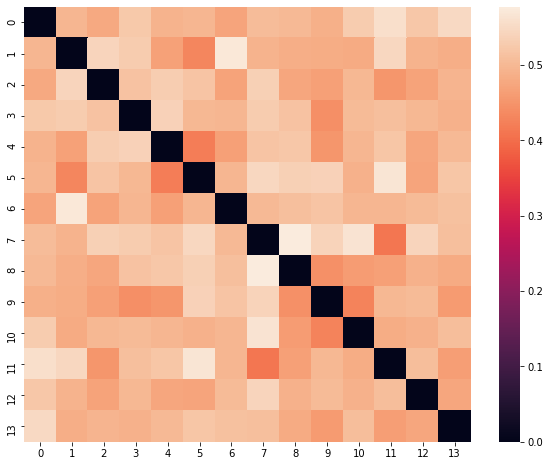

In [28]:
fig, ax = plt.subplots(figsize=(10,8))  

sns.heatmap(median_dist, annot=False, ax=ax)

# Structural Similarity

here we compute networ distances based on the graph structure alone

this is a wrapper function that computes a vector based on a few structural parameters implemented

you can create your own vector by creating your own wrapper function or call the corresponding functions


the vector will contain data about the number of nodes & edges, network density, amount of missing edges, cycles, shortest path distributions, clustering coefficient, degree centrality/ closeness centrality and betweenness centrality distribution


some paramters can be expensive on large networks

as input a list of NetworkX graph objects has to be provided

In [29]:
vectors = ga.get_network_structural_vector.estimate_vector(networks_graphs, edge_attribute="weight", is_file=False)

global
density
clustering
graph edges
cycles
shortest path distribution
cc
degree dist
cc dist
betweenness dist
[6, 10, 977, 17225, 0.03612807691662332, 0.7458486679324021, 96.38719230833766, 3.612807691662332, 16249, 4.83395901286233, 3, 7.832628880098742, 4.800582617889293, 23.130609973821834, 4.680027531903169, 5, 1.5927576450925773, -0.2283117341266693, -0.006086445487493375, 0.7458486679324021, 0.03612807691662332, 0.028688524590163935, 0.02678451440892667, 0.8783050323443166, -0.17357488585707248, 0.21673118641560865, 0.22166704519645697, 0.025461543446210454, -0.5801185013197944, -0.3039534503794612, 0.0037793052739274863, 0.0010430080220598743, 0.006185842803167373, 3.229556187549516, 15.732303246022152]
global
density
clustering
graph edges
cycles
shortest path distribution
cc
degree dist
cc dist
betweenness dist
[4, 6, 977, 13142, 0.027564306928201086, 0.25250257965820094, 97.24356930717988, 2.7564306928201088, 12166, 16.005671543646226, 6.0, 18.78448653912895, 1.725542063950

based on these vectors a distance matrix between the networks can be estimated

there is a wrapper function which estimates the euclidean, canberra, correlation, cosine and jaccard distance based on the vectors (here distance metrics that are not in [0,1] are normalized

In [30]:
euclidean, canberra, correlation, cosine, jaccard = ga.get_network_structural_vector.matrix_from_vector(vectors, normalize=True)

(0, 0)
(0, 1)
(0, 2)
(0, 3)
(0, 4)
(0, 5)
(0, 6)
(0, 7)
(0, 8)
(0, 9)
(0, 10)
(0, 11)
(0, 12)
(0, 13)
(1, 1)
(1, 2)
(1, 3)
(1, 4)
(1, 5)
(1, 6)
(1, 7)
(1, 8)
(1, 9)
(1, 10)
(1, 11)
(1, 12)
(1, 13)
(2, 2)
(2, 3)
(2, 4)
(2, 5)
(2, 6)
(2, 7)
(2, 8)
(2, 9)
(2, 10)
(2, 11)
(2, 12)
(2, 13)
(3, 3)
(3, 4)
(3, 5)
(3, 6)
(3, 7)
(3, 8)
(3, 9)
(3, 10)
(3, 11)
(3, 12)
(3, 13)
(4, 4)
(4, 5)
(4, 6)
(4, 7)
(4, 8)
(4, 9)
(4, 10)
(4, 11)
(4, 12)
(4, 13)
(5, 5)
(5, 6)
(5, 7)
(5, 8)
(5, 9)
(5, 10)
(5, 11)
(5, 12)
(5, 13)
(6, 6)
(6, 7)
(6, 8)
(6, 9)
(6, 10)
(6, 11)
(6, 12)
(6, 13)
(7, 7)
(7, 8)
(7, 9)
(7, 10)
(7, 11)
(7, 12)
(7, 13)
(8, 8)
(8, 9)
(8, 10)
(8, 11)
(8, 12)
(8, 13)
(9, 9)
(9, 10)
(9, 11)
(9, 12)
(9, 13)
(10, 10)
(10, 11)
(10, 12)
(10, 13)
(11, 11)
(11, 12)
(11, 13)
(12, 12)
(12, 13)
(13, 13)


OPTIONAL: merge the distances into a single distance matrix

In [31]:
median_dist = ga.clustering.create_median_distance_matrix([jaccard, euclidean, canberra, cosine], set_diagonal = True)

In [32]:
median_dist_structural = median_dist.copy()

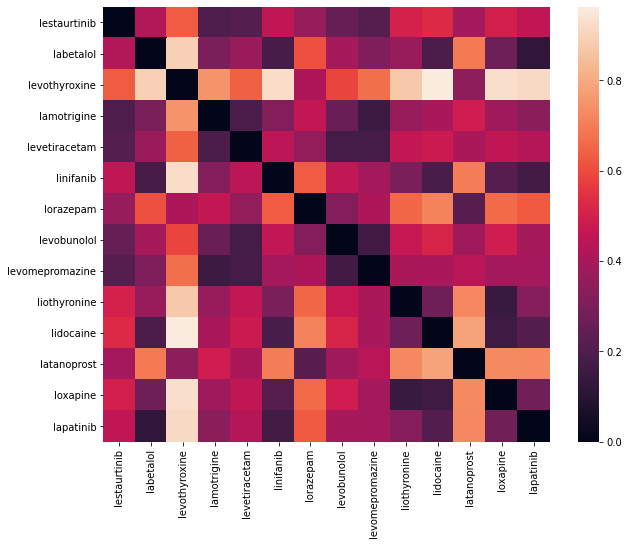

In [33]:
fig, ax = plt.subplots(figsize=(10,8))  

sns.heatmap(median_dist, annot=False, ax=ax, xticklabels=labels, yticklabels=labels)

# Random Walks

This method aims at characterizing the structural/ connectivity similarities around a specific node in different networks.
Are the same nodes connected?

Perform random walks based on differen starting nodes. Later walks between networks for the same starting node will be compared.

The here used networks have all the same nodes, so nodes can simply be set to the node object of one of the graphs.

E.g. like this:
nodes = networks_graphs[0].nodes()

If the networks have different nodes then you can select which nodes should be compared. E.g. the union of nodes or only their intersection? Or to reduce computational power you can investigate only a subset of pre-selected nodes of interest.

The example below uses the union.

In [34]:
nodes = []
for net in networks_graphs:
    for node in net.nodes():
        if node not in nodes:
            nodes.append(node)

For each node in nodes 3 times node degree random walks of length 10 are performed. Edges are selected probabilistc based on their edge weight, which is assumed to be a similarity. If no edge weights are existing then all are considered equal. Since the networks used here have all the same edge weight, probabilistic is set to False.

In [35]:
performed_walks = ga.get_walk_distances.helper_walks(networks_graphs, nodes, labels, steps=10, number_of_walks=3, degree=True, probabilistic=False, weight ="weight")

walks for node  0 outof 977
running walks 111 for node 780
running walks 54 for node 780
running walks 108 for node 780
running walks 57 for node 780
running walks 195 for node 780
running walks 36 for node 780
running walks 222 for node 780
running walks 45 for node 780
running walks 66 for node 780
running walks 57 for node 780
running walks 72 for node 780
running walks 72 for node 780
running walks 60 for node 780
running walks 63 for node 780
running walks 126 for node 2114
running walks 48 for node 2114
running walks 756 for node 2114
running walks 36 for node 2114
running walks 48 for node 2114
running walks 129 for node 2114
running walks 30 for node 2114
running walks 27 for node 2114
running walks 102 for node 2114
running walks 9 for node 2114
running walks 51 for node 2114
running walks 111 for node 2114
running walks 15 for node 2114
running walks 159 for node 2114
running walks 162 for node 6659
running walks 117 for node 6659
running walks 108 for node 6659
running walks

Now we are estimating for each starting node how often surrounding nodes/ edges have been visit w.r.t. all the visited nodes/ edges. Depending on your network sizes and selected nodes this can be quite memory intensive.

In [36]:
node_counts, edge_counts, nodes_frc, edges_frc = ga.get_walk_distances.helper_get_counts(labels, networks_graphs, performed_walks)

Now we want to estimate network similarities based on the visited nodes. For each network pair, kendall rank correlation is calculated (of the top 50 nodes)  for the same starting node. The mean correlation value of all same node pairs for a network pair is estimated and returned.

In [37]:
results_edges, results_nodes, results_edges_p, results_nodes_p = ga.get_walk_distances.helper_walk_sim(networks_graphs, performed_walks, nodes, labels, top=50, undirected=False, return_all = False, nodes_ranked=nodes_frc, edges_ranked=edges_frc)

n1 lestaurtinib
n2 lestaurtinib
n1 lestaurtinib
n2 labetalol
n1 lestaurtinib
n2 levothyroxine
n1 lestaurtinib
n2 lamotrigine
n1 lestaurtinib
n2 levetiracetam
n1 lestaurtinib
n2 linifanib
n1 lestaurtinib
n2 lorazepam
n1 lestaurtinib
n2 levobunolol
n1 lestaurtinib
n2 levomepromazine
n1 lestaurtinib
n2 liothyronine
n1 lestaurtinib
n2 lidocaine
n1 lestaurtinib
n2 latanoprost
n1 lestaurtinib
n2 loxapine
n1 lestaurtinib
n2 lapatinib
n1 labetalol
n2 labetalol
n1 labetalol
n2 levothyroxine
n1 labetalol
n2 lamotrigine
n1 labetalol
n2 levetiracetam
n1 labetalol
n2 linifanib
n1 labetalol
n2 lorazepam
n1 labetalol
n2 levobunolol
n1 labetalol
n2 levomepromazine
n1 labetalol
n2 liothyronine
n1 labetalol
n2 lidocaine
n1 labetalol
n2 latanoprost
n1 labetalol
n2 loxapine
n1 labetalol
n2 lapatinib
n1 levothyroxine
n2 levothyroxine
n1 levothyroxine
n2 lamotrigine
n1 levothyroxine
n2 levetiracetam
n1 levothyroxine
n2 linifanib
n1 levothyroxine
n2 lorazepam
n1 levothyroxine
n2 levobunolol
n1 levothyroxine


OPTIONAL: convert the correlation into a distance

In [38]:
cor_nodes = results_nodes.copy()

for index, x in np.ndenumerate(cor_nodes):
    d = (1-x)/2
    
    cor_nodes[index[0]][index[1]] = d
    
    if index[0] == index[1]:
        cor_nodes[index[0]][index[1]] = 0

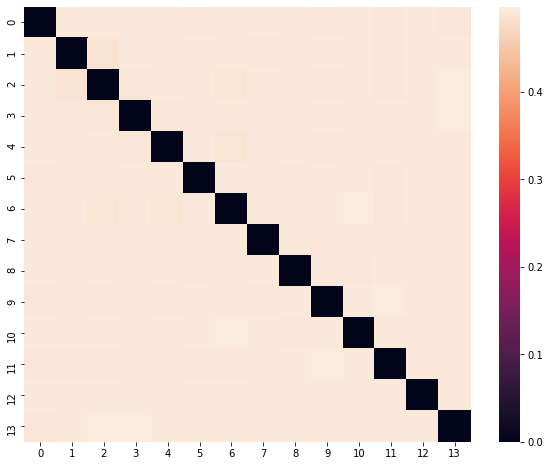

In [39]:
fig, ax = plt.subplots(figsize=(10,8))  

sns.heatmap(cor_nodes, annot=False, ax=ax)

In [52]:
cor_edges = results_edges.copy()

for index, x in np.ndenumerate(cor_edges):
    d = (1-x)/2
    
    cor_edges[index[0]][index[1]] = d
    
    if index[0] == index[1]:
        cor_edges[index[0]][index[1]] = 0

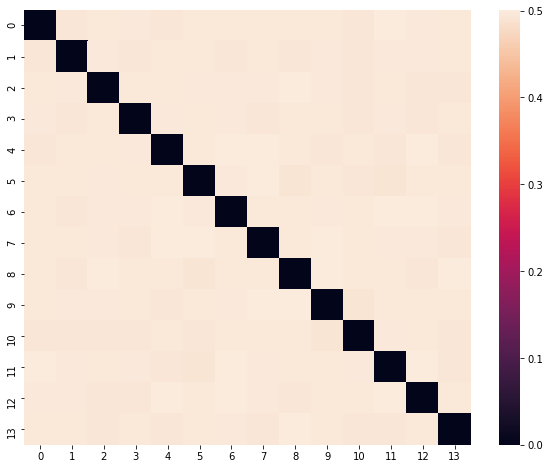

In [53]:
fig, ax = plt.subplots(figsize=(10,8))  

sns.heatmap(cor_edges, annot=False, ax=ax)

In [54]:
median_dist = ga.clustering.create_median_distance_matrix([cor_nodes, cor_edges], set_diagonal = True)

In [58]:
median_dist_walks = median_dist.copy()

# Clustering

on each of the three median distance matrices, clustering algorithms are run (here we use three algorithms, but this can be adjusted to any algorithms that you prefer for your type of analysis)

based on the individual clusterings a consensus clustering is created

each clustering algorithm is tuned based on a individually modifiable multiobjective function

In [59]:
distances = [median_dist_nodes, median_dist_edges, median_dist_structural, median_dist_walks]
distances_name = ["nodes", "edges", "structural", "walks"]

In [60]:
clusterings = {}

for n in distances_name:
    clusterings[n] = []

Hierarchical clustering is run and best k value is estimated on a multiobjective function, focusing on maximizing distance between clusters, minimizing distance within a cluster as well as having an even cluster size distribution
For the best k value the algorithm is run 10 times (One of the 3 algorithms has some randomness. In order to not bias towards one algorithm all are run the same amount of time)

In [61]:
t = []
for i in range(2,len(labels)):
    t.append(i)
    
hierarchical = {}
for d in range(len(distances)):
    dist = distances[d]
    n = distances_name[d]
    maxs = 10000

    for i, k in enumerate(t):
    #for i, k in enumerate([2, 3]):




        cl_labels = ga.clustering.hierarchical_clustering(dist, n_clusters=k, linkage="complete")


        #print("obj 1")
        avg_score = ga.clustering.multiobjective(dist, cl_labels, min_number_clusters=None, max_number_clusters=None, min_cluster_size = None, max_cluster_size=None, local =True, bet=False, e=None, s=None, cluster_size_distribution = True)



        if avg_score < maxs:
            maxs = avg_score
            mk = k





    hierarchical[n] = k
    print(maxs, mk)
    
    print("creating clusterings for", n, "with k ", mk)
    
    for xx in range(10):
    
    
        cl_labels = ga.clustering.hierarchical_clustering(dist, n_clusters=mk, linkage="complete")
        clusterings.setdefault(n, []).append(cl_labels)



1.4902789779686896 4
creating clusterings for nodes with k  4
1.4507037037037036 4
creating clusterings for edges with k  4
1.2506020007690102 3
creating clusterings for structural with k  3
1.493380861863681 5
creating clusterings for walks with k  5


Affinity propagation has no parameters to be set so does not need to be tuned

it is also run 10x (or 10x the same clustering is appended) so that for the later consensus for each clustering algorithm the same number of clusterings are provided

In [62]:
for d in range(len(distances)):
    dist = distances[d]
    n = distances_name[d]
    
    for xx in range(10):
        cl_labels = ga.clustering.affinityPropagation_clustering(dist)
        clusterings.setdefault(n, []).append(cl_labels)

K Mediods is tuned on the same multiobjective function and for the best k the algorithm is run 3 times

In [63]:
t = []
for i in range(2,len(labels)):
    t.append(i)
    
kmed = {}
for d in range(len(distances)):
    dist = distances[d]
    n = distances_name[d]
    maxs = 10000

    for i, k in enumerate(t):
    #for i, k in enumerate([2, 3]):




        cl_labels, mediods = ga.clustering.kmedoids_clustering(dist, n_clusters=k)


        #print("obj 1")
        avg_score = ga.clustering.multiobjective(dist, cl_labels, min_number_clusters=None, max_number_clusters=None, min_cluster_size = None, max_cluster_size=None, local =True, bet=False, e=None, s=None, cluster_size_distribution = True)



        if avg_score < maxs:
            maxs = avg_score
            mk = k





    kmed[n] = k
    print(maxs, mk)
    
    print("creating clusterings for", n, "with k ", mk)
    
    for xx in range(10):
    
    
        cl_labels, mediods = ga.clustering.kmedoids_clustering(dist, n_clusters=mk)
        clusterings.setdefault(n, []).append(np.array(cl_labels))



1.4897716817401323 4
creating clusterings for nodes with k  4
1.4751470258136923 3
creating clusterings for edges with k  3
1.2679952038789184 3
creating clusterings for structural with k  3
1.4941016683029404 4
creating clusterings for walks with k  4


Consensus Clustering is created from the individually performed clusterings

In [64]:
merged_clusterings = []

for key in clusterings.keys():
    for c in clusterings[key]:
        
        merged_clusterings.append(c.tolist())

Out of all clusterings an agreement graph is created.

Refer to the documentation for other parameter selections

In [76]:
consensus = ga.clustering.consensus_clustering(merged_clusterings, seed=1234, threshold="matrix", per_node=False, rep = 10)

matrix
rerun


In [77]:
consensus

array([0, 1, 2, 0, 0, 1, 2, 0, 0, 1, 1, 2, 1, 1])

The consensus yields x clusters
By tweaking the treshold or using another method it is possible to tune the consensus based on your needs (you can also use the multiobjective function again to evaluate the consensus numerically)

In [78]:
max(consensus)+1

3

In [79]:
df = pd.DataFrame(list(zip(labels, consensus)), 
               columns =['CHEMICAL', 'CLUSTER'])

In [80]:
df

,CHEMICAL,CLUSTER
0,lestaurtinib,0
1,labetalol,1
2,levothyroxine,2
3,lamotrigine,0
4,levetiracetam,0
5,linifanib,1
6,lorazepam,2
7,levobunolol,0
8,levomepromazine,0
9,liothyronine,1
